# STAT207 Mini-Project #1 - Used Car Prices based on Mileage Accumulation and Popular Car Brands


Conan Zhang

In [1]:
#Imports!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Introduction

#### Research Question
In this report, let's dive deeper into the automotive world, more specifically, in the birthplace of numerous car manufacturers, Germany. Cars have become a dominant force in the passenger transportation industry; however, buying a new car is certainly expensive, especially in this economy. By investigating the question of: "How does the nature of the relationship between mileage and price for used cars change for different car makes in the dataset?", consumers can look at potential price points across a range of miles driven for select car brands and make financial decisions in picking the right company and choosing their next used car!

#### Research Motivation
By answering our research question, consumers can pinpoint when they're getting a reasonable deal for the mileage accumulated for a specfic car brand when buying a used vehicle from their company. In addition, car companies can better estimate the market value they can ask for from car buyers, and in turn, current car owners can gain of sense of their own car price depreciation based on their brand to plan for maintenances & repairs, budget for future expenses, and better understand their own car's trade-in value.

## 2. Dataset Discussion

#### Dataset Display


In [2]:
df = pd.read_csv('autoscout24-germany-dataset.csv')
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [3]:
df.shape[0]

46405

#### Dataset Source
This dataset was taken and downloaded from Kaggle on September 19th, 2023. (https://www.kaggle.com/datasets/ander289386/cars-germany/code).

#### Original Dataset Information
Each row in this dataset represents an unique vehicle's respective mileage, make, model, type of fuel, type of gear, type of offer, sale price, horsepower, and registration year in Germany. Each input from the data set was collected from AutoScout24 (the largest online pan-European car market) where ZenRows (an easy use AI scraping tool) parsed the data into a single csv file.
This dataset is not inclusive of all cars as we are only looking at registered cars in Germany between 2011-2021. Therefore, cars registered outside Germany, cars registered before 2011 and after 2021, and cars that haven't been registered into the AutoScout24 database are all observations that would be left out.
Those potential car buyers might have to now resort to looking towards their own country/region's reports for car data to determine price points in their own area. Customers also now have to factor in multiple external factors/biases when analyzing this dataset (Germany's purchasing power parity, company headquarters & manufacturing locations, transportation statistics, etc.), making this report slightly less useful for them.

## 3. Dataset Cleaning

#### Initial Cleaning
First, all cars that are not Used (Demo-only, Employee-only, etc.) will be filtered out of the dataset to meet our research goal. (Dropped 6283 rows). Next, all cars that do not use Gasoline (Diesel, Electric, etc.) will be filtered out the data set to represent the majority of cars on the market. (Dropped 15624 rows)

In [4]:
df1 = df[df['offerType'] == 'Used']
df.shape[0] - df1.shape[0]

6283

In [5]:
df2 = df1[df1['fuel'] == 'Gasoline']
df1.shape[0] - df2.shape[0]

15624

#### Missing Value Detection and Cleaning

In [6]:
df2.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [7]:
df2.isna().sum()

mileage       0
make          0
model        63
fuel          0
gear         58
offerType     0
price         0
hp           12
year          0
dtype: int64

Because all the data types of the data frame make sense, there are no implicit missing values that have not been read by pd.read_csv. Now checking the data frame for explicit values it appears there are models that are unidentified, gears that are unidentified, and horsepowers not recorded (All NaN values). Each of these data points will be dropped from our data frame to ensure no "weird" data enters into the final analysis. (Dropped 132 rows)

In [8]:
df3 = df2.dropna()
df2.shape[0] - df3.shape[0]

132

In [9]:
df3.shape[0]

24366

Although these data points could be real meaningful points that are simply missing a few inputs, removing away 132 rows that could misrepresent our data is an overall greater benefit to our research goal. There are still 24366 observation points still usable to construct a conductive analysis, and thus taking away <1% of our initial data observations would not affect our result signifigantly.

#### Outlier Cleaning - Single Variable Outlier Inspection

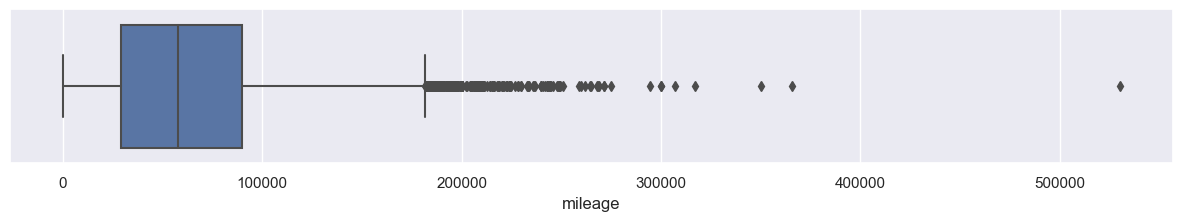

In [10]:
plt.figure(figsize=(15,2))
sns.boxplot(x='mileage', data=df3)
plt.show()

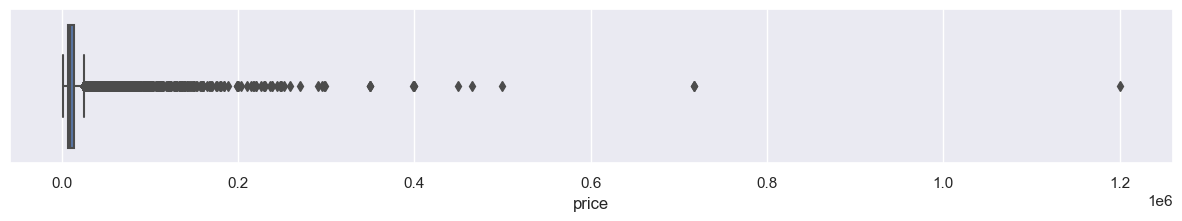

In [11]:
plt.figure(figsize=(15,2))
sns.boxplot(x='price', data=df3)
plt.show()

Displayed in the boxplots above for mileage and price illustrates a ton of high value outliers for both of the plots. If these outliers are not removed from our data frame, our mean and standard deviation of prices and mileage could skyrocket misrepresenting our future model. Although, by removing these data points, we could also be misrepresenting high mileage or high price cars, it is reasonable that we are only considering cars that range within the bulk of our data. Thus, it would be desirable to remove all of these high values to more effectively model the association between mileage and price. (Dropped 2607 rows).

In [12]:
Q1 = df3['mileage'].quantile(0.25) 
Q3 = df3['mileage'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

df4 = df3[df3['mileage'] < upper]

In [13]:
Q11 = df4['price'].quantile(0.25) 
Q33 = df4['price'].quantile(0.75)
IQR1 = Q33-Q11
upper1 = Q33 + 1.5*IQR1

df5 = df4[df4['price'] < upper1]

In [14]:
df3.shape[0] - df5.shape[0]

2607

#### Additional Cleaning

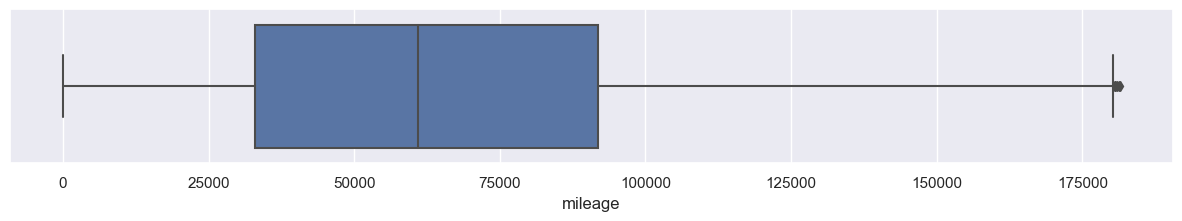

In [15]:
plt.figure(figsize=(15,2))
sns.boxplot(x='mileage', data=df5)
plt.show()

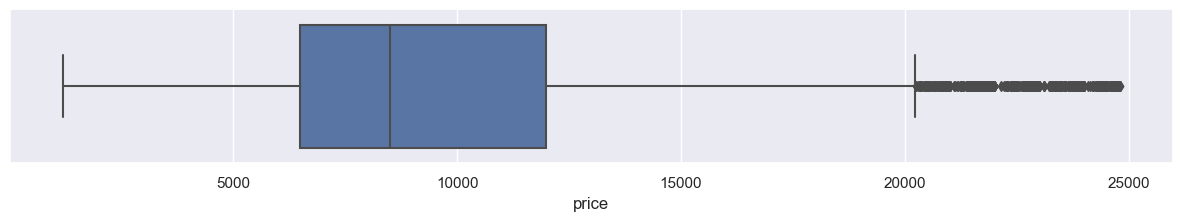

In [16]:
plt.figure(figsize=(15,2))
sns.boxplot(x='price', data=df5)
plt.show()

Looking at our boxplots again, there seems to still be a huge range in both mileage and prices. To combat this, let's limit our range of mileage of cars under 100,000 miles and prices under 25,000 dollars. It can be reasonably assumed that the average customer would not want to buy a car with more than 100,000 miles where at that point, the car may need frequent and expensive maintenances. It can also be reasonably assumed that the average customer would not want to pay more than $25,000 where at that point, buying a new car is a more sensible option. (Dropped 4182 rows)

In [17]:
df6 = df5[(df5['mileage'] < 100000) & (df5['price'] < 25000)]
df5.shape[0] - df6.shape[0]

4182

#### Outlier Cleaning - Two Variable Outlier Inspection

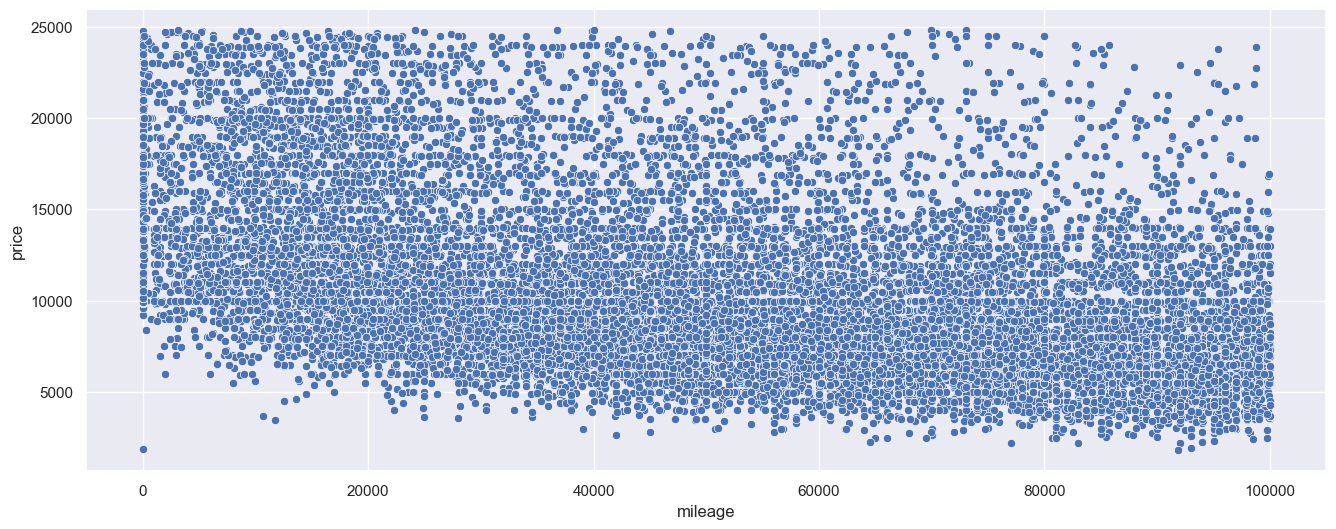

In [18]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='mileage',y='price',data = df6)
plt.show()

Again looking at the data, there seems to be outlier data points at ~0 miles and a few at ~3000 dollars. To avoid any "weird" data points and unusual scenarios, we'll simply remove all cars under 500 miles and under 4000 dollars. Cars driven under 500 miles could be classified as new which would introduce external factors detering us from our original research goal in only studying used cars. Cars under 4000 dollars are also an unreasonable market price given how expensive a new car actually sells for. In removing these "outliers", we can only look at used cars with reasonable mileage and reasonable price points. While we could be misrepresenting lower mileage and price used cars, it is safe to say with the number of data points we have, removing special conditions would benefit our overall analysis more than misrepresent a small portion of actual vehicles. (Dropped 782 rows)

In [19]:
df7 = df6[(df6['mileage'] > 500) & (df6['price'] > 4000)]
df6.shape[0] - df7.shape[0]

782

#### Sample Size Cleaning
Now looking at our categorical variable of car makes, we'd like to ensure that each of these car makes have at least 200 data points corresponding to it. Any make count lower than 200 will be removed from our overall analysis. While this cleaning cutoff decision removes a ton of car brands, we'd only like to analyze popular car brands on the market in Germany, where we can generate analysis with many observations/data points. (Dropped 353 rows)

In [20]:
df7['make'].value_counts()

Volkswagen       2412
Opel             2368
Ford             1732
Renault          1076
Skoda            1020
SEAT              900
Hyundai           821
Fiat              771
smart             768
Peugeot           575
Toyota            530
Kia               446
Citroen           444
Audi              372
Dacia             370
Nissan            342
Mercedes-Benz     317
BMW               290
MINI              237
Suzuki            221
Mazda             218
Mitsubishi        212
Honda             113
Chevrolet          76
Volvo              36
Alfa               33
Jeep               18
Lada               15
Subaru             12
Abarth             11
SsangYong          11
Lancia              6
Daihatsu            5
Lexus               4
Dodge               4
DS                  2
Infiniti            2
Baic                2
Chrysler            1
Piaggio             1
DFSK                1
Name: make, dtype: int64

In [21]:
counts = df7['make'].value_counts()
df8 = df7[df7['make'].isin(counts.index[counts > 200])]
df8['make'].value_counts()

Volkswagen       2412
Opel             2368
Ford             1732
Renault          1076
Skoda            1020
SEAT              900
Hyundai           821
Fiat              771
smart             768
Peugeot           575
Toyota            530
Kia               446
Citroen           444
Audi              372
Dacia             370
Nissan            342
Mercedes-Benz     317
BMW               290
MINI              237
Suzuki            221
Mazda             218
Mitsubishi        212
Name: make, dtype: int64

In [22]:
df7.shape[0]-df8.shape[0]

353

## 4. <u>Research Question: How does the Relationship between Mileage and Price Change for Used Cars based on Different Car Makes in the Dataset?

#### Visualizations

In [23]:
over_600 = df8['make'].value_counts()
df9 = df8[df8['make'].isin(over_600.index[over_600 > 600])]

In [24]:
under_600 = df8['make'].value_counts()
df10 = df8[df8['make'].isin(under_600.index[under_600 < 600])]

To make our visualization more clear, all car makes with over 600 vehicles in the dataset will be condensed into one graph while all car brands under 600 vehicles in the dataset will be condensed into another. Displayed below illustrates our separated dataframes. While the plots seem to have data points all over the place, this is due to the different types of models within each brand starting at higher/lower prices. However, we can still interpret a negative trend for both plots.

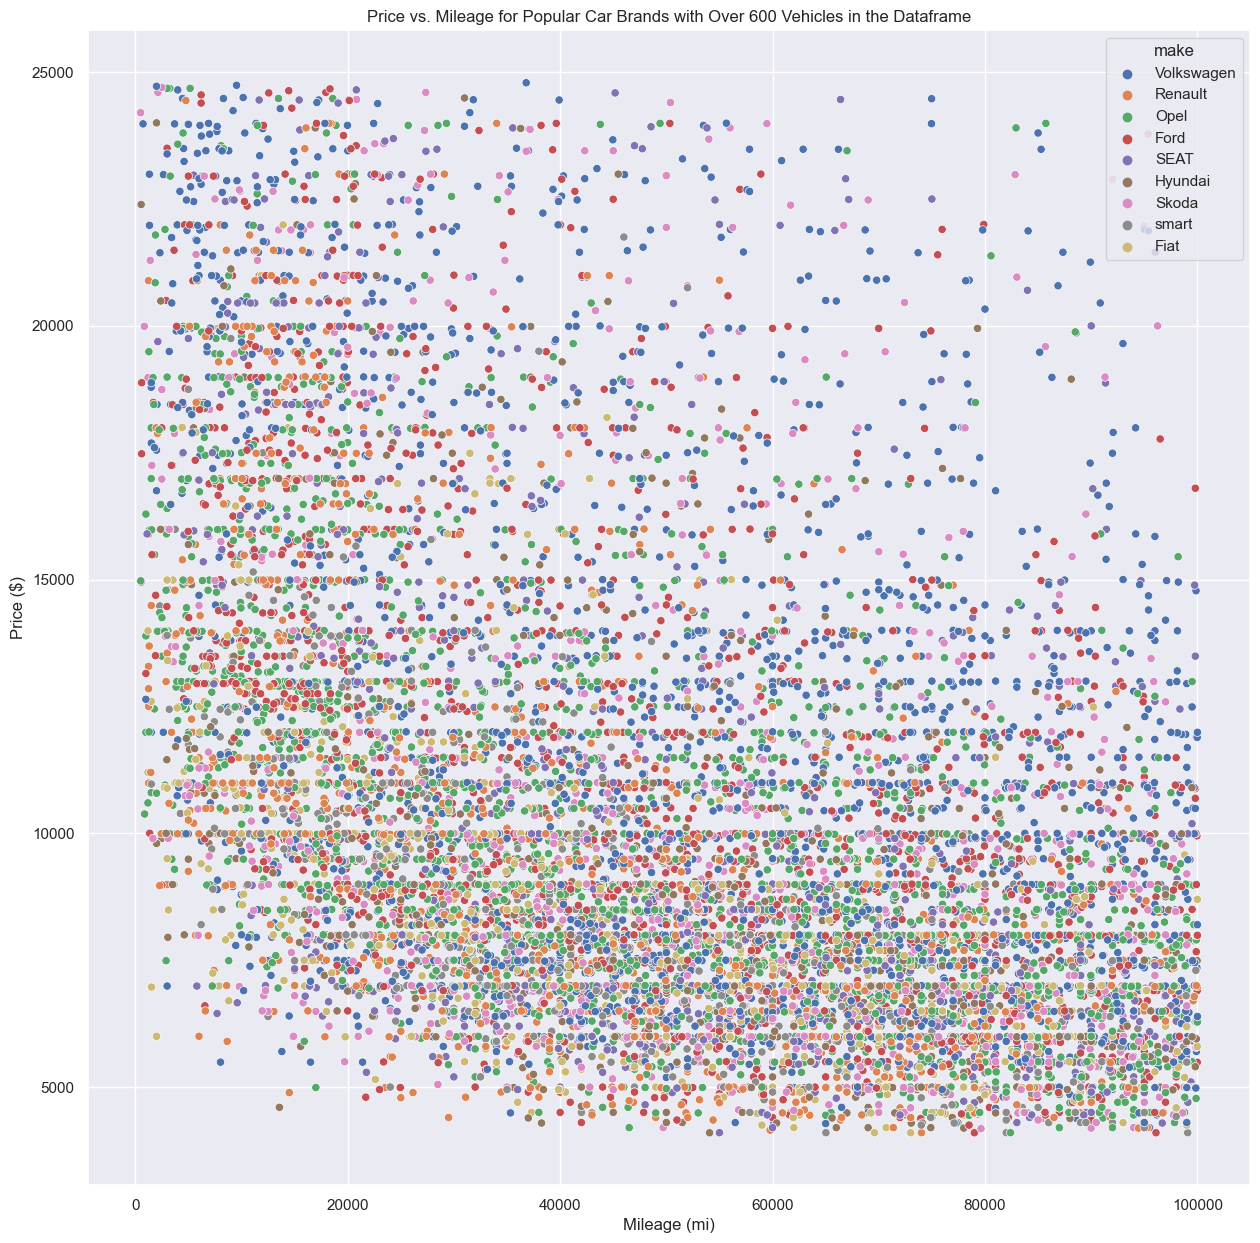

In [25]:
#Over 600 Vehicles
plt.figure(figsize=(15,15))
plt.title('Price vs. Mileage for Popular Car Brands with Over 600 Vehicles in the Dataframe')
plt.xlabel('Mileage (mi)')
plt.ylabel('Price ($)')
sns.scatterplot(x='mileage',y='price',hue='make',data=df9)
plt.show()

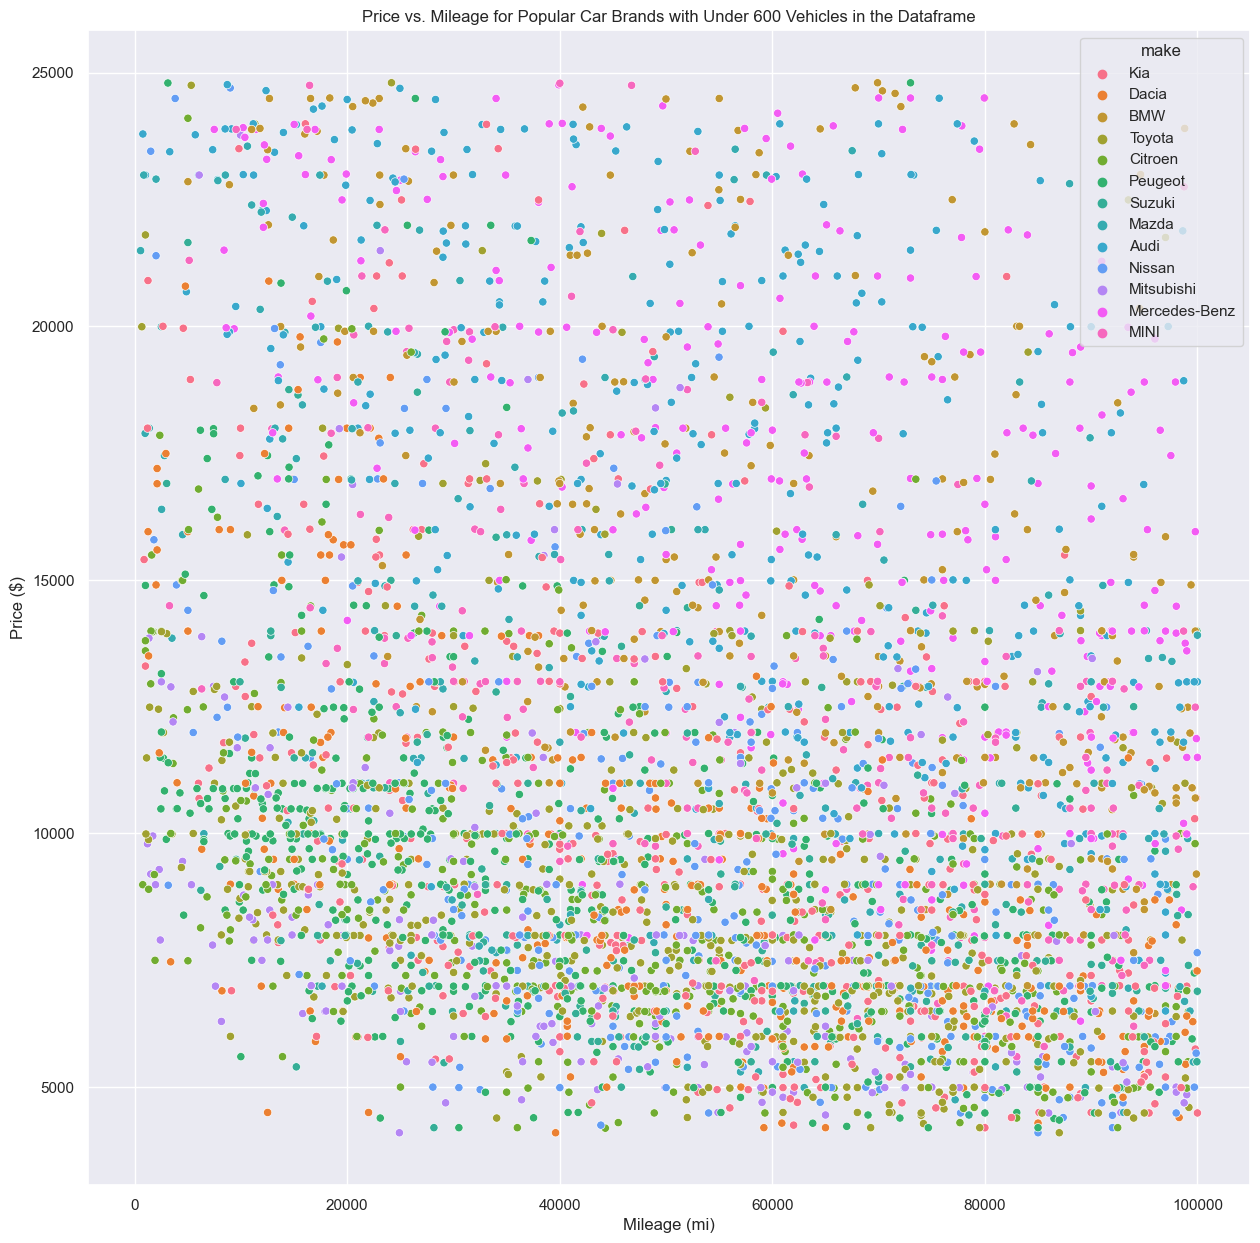

In [26]:
#Under 600 Vehicles
plt.figure(figsize=(15,15))
plt.title('Price vs. Mileage for Popular Car Brands with Under 600 Vehicles in the Dataframe')
plt.xlabel('Mileage (mi)')
plt.ylabel('Price ($)')
sns.scatterplot(x='mileage',y='price',hue='make',data=df10)
plt.show()

With our two scatterplots, we can also model a best fit line for each of our car makes by using lmplot. Displayed below illustrates our best fit lines for each car make considering all the data points. It is not surprising that a negative trend exists for all car makes, considering that in general, the longer a car has been used, the cheaper the car becomes worth. A correlation chart is also displayed below each lmplot indicating each of the car make's best-fit line slope value.

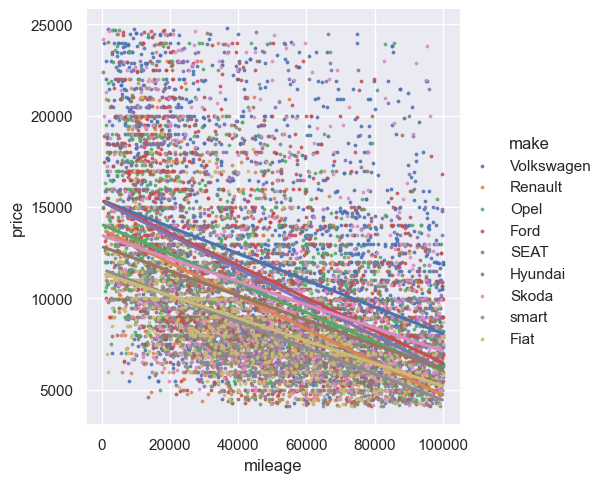

In [27]:
#Over 600 Vehicles
sns.lmplot(x='mileage',y='price',hue='make',ci= False,data=df9,scatter_kws={"s": 3})
plt.show()

In [28]:
df9[['mileage','price','make']].groupby(['make']).corr().sort_values(by='price', ascending=False)

,,mileage,price
make,,,
Renault,price,-0.553260,1.000000
Opel,price,-0.569658,1.000000
Volkswagen,price,-0.393352,1.000000
Skoda,price,-0.356779,1.000000
SEAT,price,-0.485026,1.000000
Fiat,price,-0.567529,1.000000
smart,price,-0.645086,1.000000
Hyundai,price,-0.443597,1.000000
Ford,price,-0.531694,1.000000


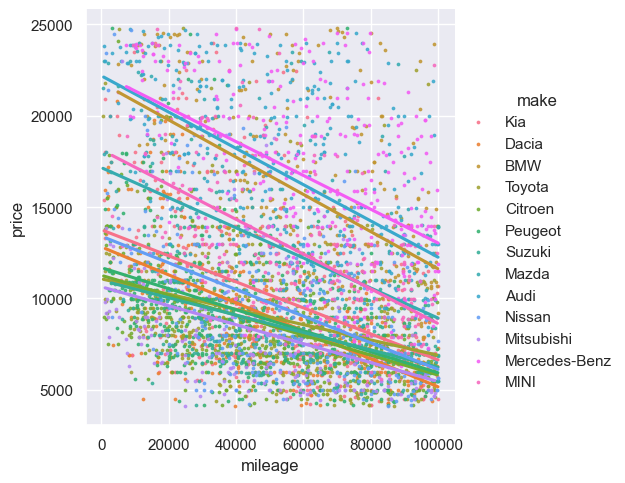

In [29]:
#Under 600 Vehicles
sns.lmplot(x='mileage',y='price',hue='make',ci= False,data=df10,scatter_kws={"s": 3})
plt.show()

In [30]:
df10[['mileage','price','make']].groupby(['make']).corr().sort_values(by='price', ascending=False)

,,mileage,price
make,,,
Mazda,price,-0.461308,1.000000
Kia,price,-0.438117,1.000000
Suzuki,price,-0.402517,1.000000
Peugeot,price,-0.478635,1.000000
Nissan,price,-0.477149,1.000000
Mitsubishi,price,-0.392219,1.000000
Mercedes-Benz,price,-0.490049,1.000000
Audi,price,-0.542482,1.000000
MINI,price,-0.572460,1.000000


#### Summary Statistics
Direction Change: All car makes have negative relationships between mileage and price, meaning: on average, as mileage increases, each car makes' price decreases. Shape Change: All car makes have linear relationships between mileage and price as the plots indicate a moderate number of data points forming a line towards the bottom right direction. Strength Change: The strength of the relationship for cars like smart (-0.645086), MINI (-0.572460), and DACIA (-0.609945) are moderately stronger than cars like Toyota (-0.312978), Skoda (-0.356779), and Volkswagon (-0.393352). A majority of correlation values for all the makes fall within -0.45 to -0.6. Outliers Change: For both plots, it is hard to pinpoint which car make has severe outliers due to the signifigant number of data points that exist across the entire range of mileage and prices. However, given the huge bulk of data resulting in a negative linear trend, these data points don't skew our analysis severely. The response variable of price is also not only affected by mileage accumulated, but by many other external factors, which is why these outliers may not be directly related to just the relationship between price and mileage. Slope Change: All of these car makes illustrate relatively similar slopes.

#### Other Statistics
Y-intercepts: Car makes like BMW, Mercedez, Audi have signifigantly greater starting prices for zero mileage used cars than cars makes like Fiat, smart, and Mitsubishi which makes logical sense considering these brands are deemed "luxury" and high-end brands. Interaction Effect: Because the majority of slopes for each car look parallel to each other, but some cars have moderately steeper slopes, there is very minimal interaction between these different car makes and the response variable price. 

#### Research Question Answer
Overall, for all our various popular car makes, the relationship between mileage and price suggests a moderate negative linear relationship. Our visualizations illustrate that with an accumulation in mileage across every single one our different car makes, the price/value of the used car declines. Car makes may have different purposes as vehicles (luxury, off-road, fuel efficient, etc.) explaining the small differences in correlations; however, the overall association of mileage vs. price stays consistent across our datasets.

## 5. Conclusion

#### Summarization
In conclusion, our categorical variable of car makes doesn't appear to have a signifigant effect on price vs. mileage; however, there are some interesting trends to consider. For example, in our first scatterplot, Volkswagon (Blue dots) and Ford (Red dots) and in our second scatterplot, Audi (Dark Teal dots) and Mercedez Benz (Pink dots), all have a huge prominence of data points across the entire range of mileage and prices in the plots. One reason for this trend could be that Volkswagon, Audi, and Mercedez are all German-based companies with tons of car models, so it'd be logical for why there are so many data points scattered everywhere. Another reason could just be that these specific car models are so popular in Germany, that sellers put out unique prices on the market for unique types of models from these brands. Another trend is the subtle difference in correlation values for different car makes due to longevity and purpose. For example, Toyota and Volkswagen are known for having a vast collection of models that are durable and long-lasting meant for road-trips and passenger transportation (likely selling for all sorts of prices), which explains their smaller correlations of (-0.312978) and (-0.393352). In contrast, brands like smart (-0.645086), MINI (-0.572460), and -DACIA (-0.609945) have relatively high correlations suggesting that their brands sell only a few models that all follow a similar price depreciation for mileage. Even with the cleaning of all these external factors (Used cars only, Gasoline cars only, Cars with "normal" numbers), there still are a ton of unique/outlier data that skews our correlation coefficients.

#### Shortcomings/Caveats
In our analysis, tons of data points were removed/cleaned to achieve our research goal, and the entire dataset already had its own limitations. Since the dataframe came from an online website that scours registered cars in Germany from 2011-2021, all of this analysis can't be applied countries outside of Germany and any cars not in the registered market. Also, using this dataset today in 2023 would also be misrepresentative as inflation, stock changes, and new innovations can skew how different used cars from various car brands would sell for. Instead a person using the analysis can use these answers to generally understand how car brands depreciate over mileage by pinpointing the slopes of these scatterplots. They could also use the correlation coefficients to understand which car companies specialize in car brands and which companies have a vast number of models in the dataframe.

#### Future Work
In using car makes as our categorical variable, we include a lot of car companies, making it hard to draw individual comparisons towards our relationship between price and mileage. In the future, maybe separating the cars by type (sedan, SUV, minivan, truck, etc.) would make analyzing the relationship between price and mileage much more clear as each type of car has its own type of function. 